In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import tensorflow.keras as keras

import keras.backend as K

import matplotlib.pyplot as plt
import random

import librosa
import math

In [1]:
JSON_PATH="./Extracted_data.json"


In [5]:
def load_data_from_json(json_path):
    
    with open(json_path, "r") as f:
        data=json.load(f)
    
    
    X=data["mfcc"]
    Y=data["labels"]
    print("DATA IS LOADED SUCCESSFULLY")
    return np.array(X), np.array(Y),data["mapping"]

In [6]:
X,Y,music_genres = load_data_from_json(JSON_PATH)

DATA IS LOADED SUCCESSFULLY


In [7]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,shuffle=True, random_state=59,stratify=Y)

In [8]:

print(len(x_train),len(y_train),len(x_test),len(y_test))

6690 6690 3296 3296


In [9]:
X.shape,Y.shape 

((9986, 130, 13), (9986,))

In [9]:
X[0]

array([[-2.42435989e+02,  1.02184860e+02, -9.91323471e+00, ...,
        -3.95323563e+00, -2.40564466e+00, -2.38090611e+00],
       [-2.12989746e+02,  1.03544777e+02, -1.08341732e+01, ...,
        -5.81353188e+00,  2.64356732e+00, -2.80662107e+00],
       [-1.95409332e+02,  1.04360657e+02, -1.85501546e-01, ...,
        -1.08171635e+01, -5.88806152e-01, -5.28410530e+00],
       ...,
       [-1.24157700e+02,  6.37352219e+01,  2.11729393e+01, ...,
        -1.65676613e+01,  1.37965145e+01, -2.31835365e+01],
       [-1.11283928e+02,  6.05447235e+01,  1.33710301e+00, ...,
        -1.22842140e+01,  1.48256054e+01, -1.58052368e+01],
       [-1.31811951e+02,  6.65644531e+01, -7.93185902e+00, ...,
        -8.66252136e+00,  1.16732750e+01, -8.72385693e+00]])

In [ ]:
Y[0]

0

SIMPLE ANN

In [ ]:
ann_model=keras.models.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation="softmax")
])

In [ ]:
optimiser=keras.optimizers.Adam(learning_rate=0.0001)
ann_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=optimiser,metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
ann_history=ann_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 5s 7ms/step - loss: 15.5882 - accuracy: 0.1589 - val_loss: 2.2328 - val_accuracy: 0.2145
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 3.9859 - accuracy: 0.1632 - val_loss: 2.2344 - val_accuracy: 0.1690
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 2.8061 - accuracy: 0.1393 - val_loss: 2.2890 - val_accuracy: 0.1144
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 2.5438 - accuracy: 0.1390 - val_loss: 2.2727 - val_accuracy: 0.1262
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 2.4202 - accuracy: 0.1447 - val_loss: 2.2607 - val_accuracy: 0.1296
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 2.3682 - accuracy: 0.1466 - val_loss: 2.2526 - val_accuracy: 0.1320
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 2.3098 - accuracy: 0.1593 - val_loss: 2.2209 - val_accuracy: 0.149

In [ ]:
ann_model.save("ann_model.h5")

In [21]:
def plot_accuracy_error(history):
    fig,axis=plt.subplots(2)
    
    fig.set_size_inches(10,8)
    axis[0].plot(history.history["accuracy"],label="train_accuracy")
    axis[0].plot(history.history["val_accuracy"],label="val_accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy eval")
   
   
   
    axis[1].plot(history.history["loss"],label="train_error")
    axis[1].plot(history.history["val_loss"],label="val_error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error eval")
    
    plt.show()    
       

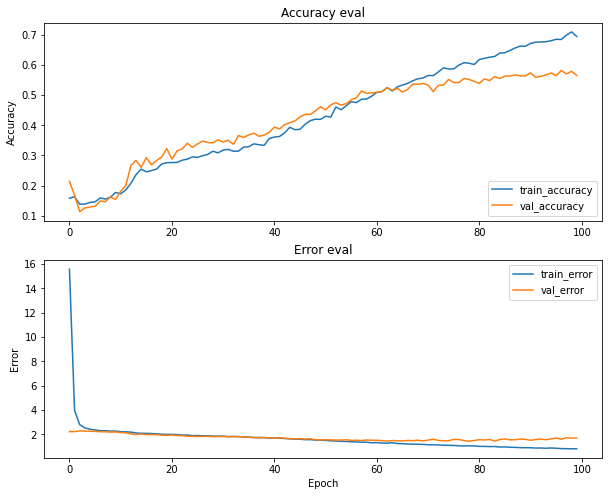

In [ ]:
plot_accuracy_error(ann_history)

CREATING CNN MODEL

In [10]:
X=X.reshape(-1,X.shape[1],X.shape[2],1)
Y=Y.reshape(-1,1)

In [11]:
X.shape,Y.shape

((9986, 130, 13, 1), (9986, 1))

In [12]:
cnn_x_train,cnn_x_test_,cnn_y_train,cnn_y_test_ = train_test_split(X,Y,random_state=56,shuffle=True,stratify=Y,test_size=0.4)
cnn_x_val,cnn_x_test,cnn_y_val,cnn_y_test = train_test_split(cnn_x_test_,cnn_y_test_,random_state=89,shuffle=True,stratify=cnn_y_test_,test_size=0.33)

In [13]:
cnn_y_test_.shape,cnn_x_test_.shape

((3995, 1), (3995, 130, 13, 1))

In [14]:
cnn_x_train.shape,cnn_y_train.shape

((5991, 130, 13, 1), (5991, 1))

In [15]:
cnn_x_val.shape,cnn_y_val.shape

((2676, 130, 13, 1), (2676, 1))

In [16]:
X.shape[0],X.shape[1],X.shape[2] 

(9986, 130, 13)

In [17]:
keras.backend.set_image_data_format('channels_last')


In [18]:
input_shape=(X.shape[1],X.shape[2],1)
input_shape

(130, 13, 1)

In [17]:
def create_model():
        # build network topology
    cnn_model=keras.models.Sequential()
    # 1st conv layer
    cnn_model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same",))
    cnn_model.add(keras.layers.BatchNormalization())
      
    # 2nd conv layer
    cnn_model.add(keras.layers.Conv2D(128,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization())
   
    cnn_model.add(keras.layers.Dropout(0.4))
    
    # 3rd conv layer
    cnn_model.add(keras.layers.Conv2D(64,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,2),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization())      
 
    
    cnn_model.add(keras.layers.Dropout(0.2))
    
    
    # flatten output and feed it into dense layer            
    cnn_model.add( keras.layers.Flatten())
    
    #1st Dense Layer
    cnn_model.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.5))
    
    #2nd Dense Layer
    cnn_model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.4))
    
    #Output Layer
    cnn_model.add(keras.layers.Dense(10,activation='softmax'))

    cnn_optimiser=keras.optimizers.Adam(learning_rate=0.0005)

    cnn_model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=cnn_optimiser,metrics=['accuracy'])   
    return cnn_model
     

In [18]:
cnn_model=create_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 64)        256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 5, 128)        32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 3, 128)       0         
 2D)                                                             
                                                        

In [19]:
cnn_history=cnn_model.fit(cnn_x_train,cnn_y_train,validation_data=(cnn_x_val,cnn_y_val),verbose=1,epochs=250,batch_size=32)

Epoch 1/250
188/188 [==============================] - 15s 17ms/step - loss: 35.9930 - accuracy: 0.3191 - val_loss: 7.9327 - val_accuracy: 0.4208
Epoch 2/250
188/188 [==============================] - 2s 13ms/step - loss: 3.7237 - accuracy: 0.4697 - val_loss: 2.1361 - val_accuracy: 0.4828
Epoch 3/250
188/188 [==============================] - 3s 14ms/step - loss: 1.8571 - accuracy: 0.5034 - val_loss: 1.7489 - val_accuracy: 0.5269
Epoch 4/250
188/188 [==============================] - 3s 14ms/step - loss: 1.7133 - accuracy: 0.5368 - val_loss: 1.7638 - val_accuracy: 0.5116
Epoch 5/250
188/188 [==============================] - 2s 12ms/step - loss: 1.6817 - accuracy: 0.5545 - val_loss: 1.5737 - val_accuracy: 0.6252
Epoch 6/250
188/188 [==============================] - 2s 12ms/step - loss: 1.6409 - accuracy: 0.5770 - val_loss: 1.6085 - val_accuracy: 0.5859
Epoch 7/250
188/188 [==============================] - 2s 12ms/step - loss: 1.6212 - accuracy: 0.5976 - val_loss: 1.7411 - val_accurac

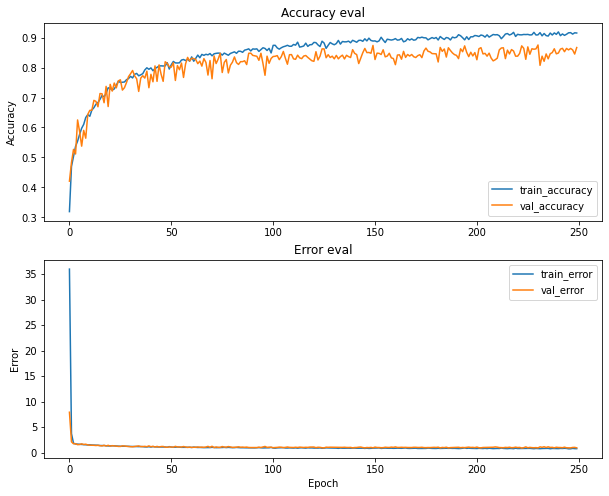

In [22]:
plot_accuracy_error(cnn_history)

In [23]:
cnn_model.save("cnn_model.h5")

In [19]:
X_predi=cnn_x_test[20]
Y_predi=cnn_y_test[20]
X_predi=X_predi.reshape(1,X_predi.shape[0],X_predi.shape[1],1)
X_predi.shape

(1, 130, 13, 1)

In [20]:
model=keras.models.load_model('cnn_model.h5')

In [21]:
prediction=model.predict(X_predi)

In [22]:
prediction.shape,Y_predi.shape

((1, 10), (1,))

In [23]:
predicted_index=np.argmax(prediction,axis=1)
print(prediction[0][predicted_index],predicted_index)

[0.943131] [9]


In [24]:
Y_predi[0]

9


index :300
real Genre : classical
predicted Genre :classical


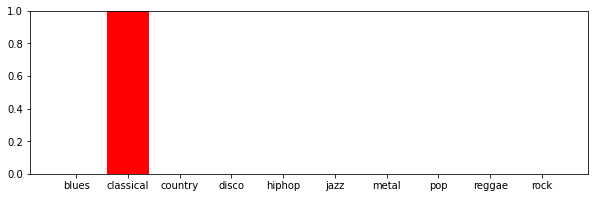


index :801
real Genre : jazz
predicted Genre :jazz


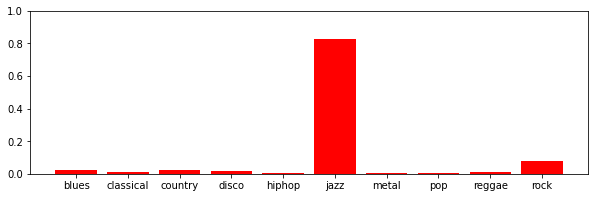


index :946
real Genre : pop
predicted Genre :pop


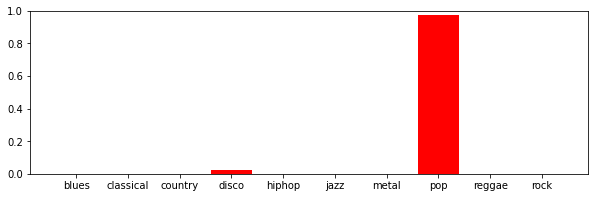


index :608
real Genre : country
predicted Genre :country


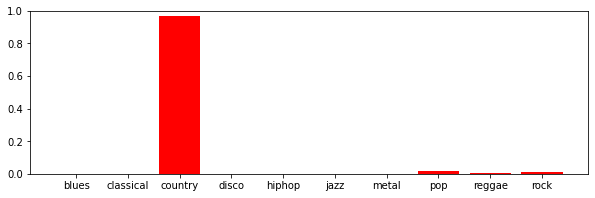


index :1285
real Genre : pop
predicted Genre :pop


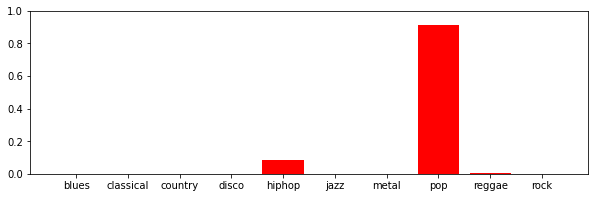


index :116
real Genre : reggae
predicted Genre :reggae


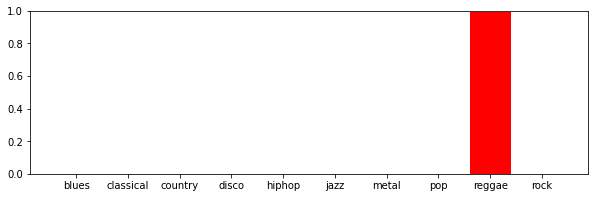


index :275
real Genre : rock
predicted Genre :rock


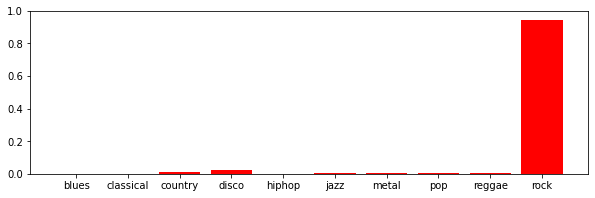


index :426
real Genre : jazz
predicted Genre :jazz


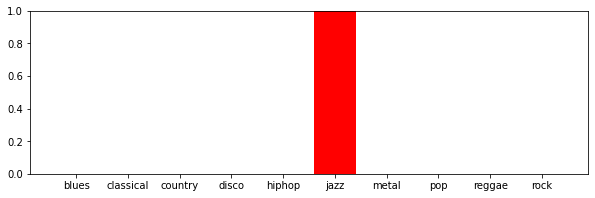


index :337
real Genre : pop
predicted Genre :pop


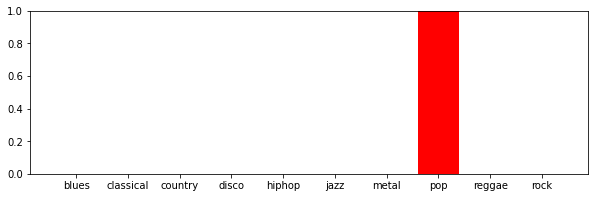


index :453
real Genre : disco
predicted Genre :pop


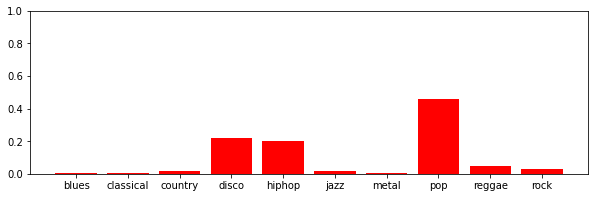


index :493
real Genre : blues
predicted Genre :country


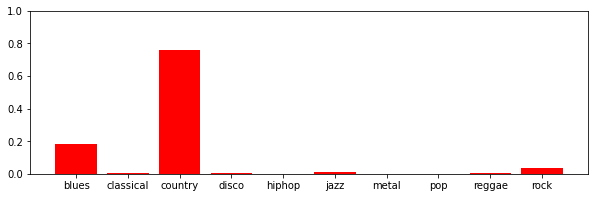


index :752
real Genre : classical
predicted Genre :classical


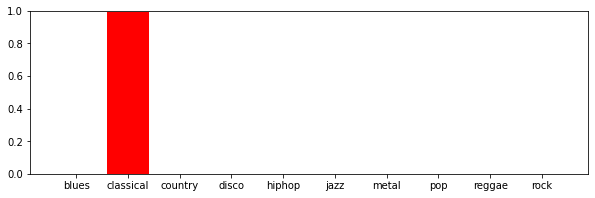


index :1213
real Genre : reggae
predicted Genre :reggae


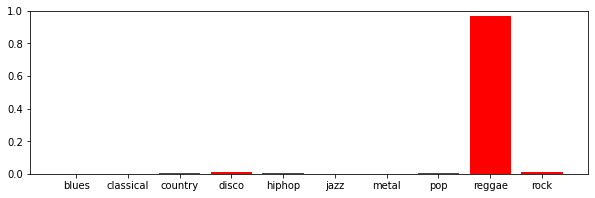


index :459
real Genre : disco
predicted Genre :disco


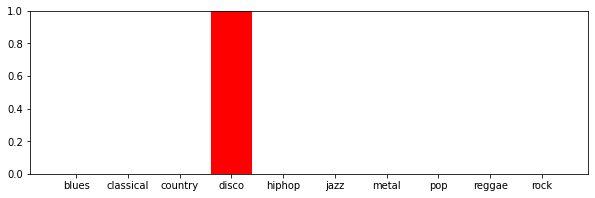


index :551
real Genre : reggae
predicted Genre :reggae


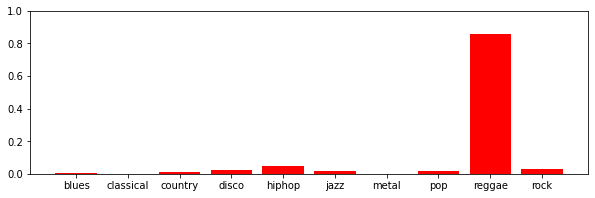


index :1165
real Genre : reggae
predicted Genre :reggae


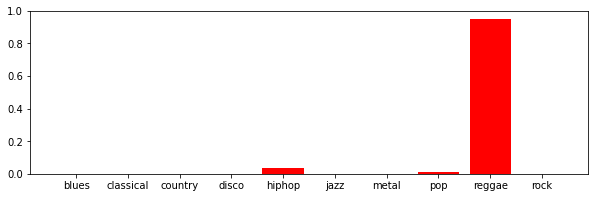


index :939
real Genre : disco
predicted Genre :disco


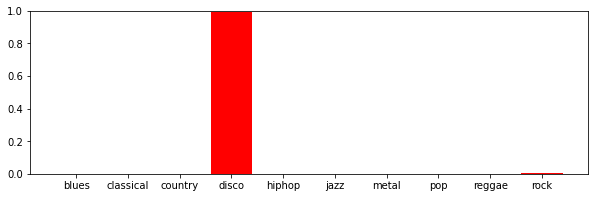


index :1050
real Genre : blues
predicted Genre :blues


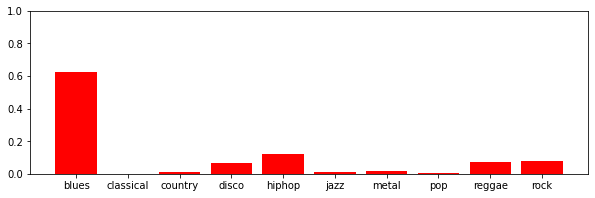


index :1064
real Genre : jazz
predicted Genre :jazz


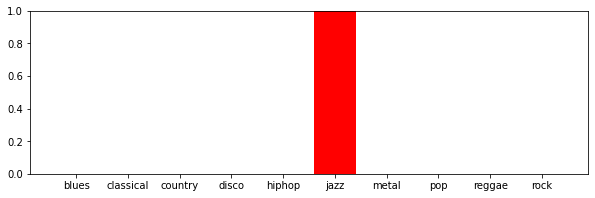


index :202
real Genre : jazz
predicted Genre :jazz


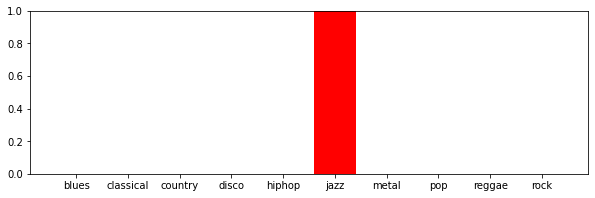


index :710
real Genre : reggae
predicted Genre :reggae


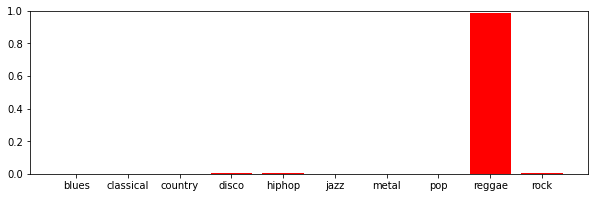


index :1266
real Genre : hiphop
predicted Genre :hiphop


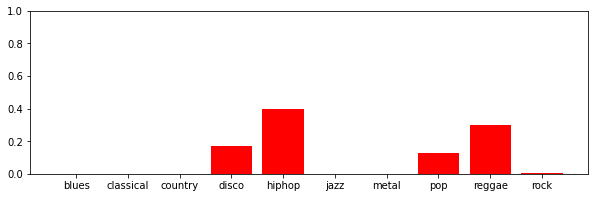


index :169
real Genre : blues
predicted Genre :blues


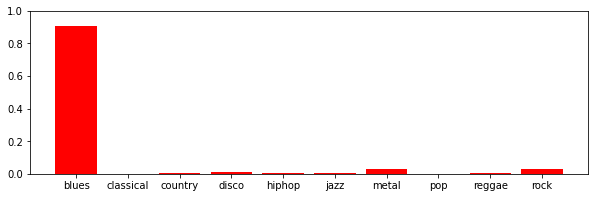


index :461
real Genre : blues
predicted Genre :blues


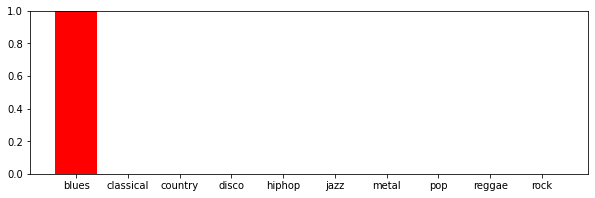


index :745
real Genre : pop
predicted Genre :pop


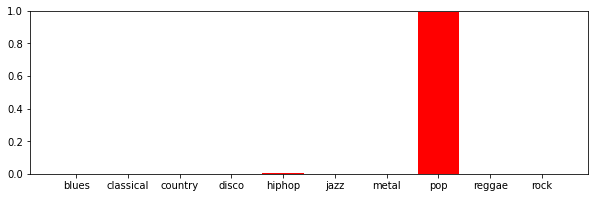


index :726
real Genre : blues
predicted Genre :country


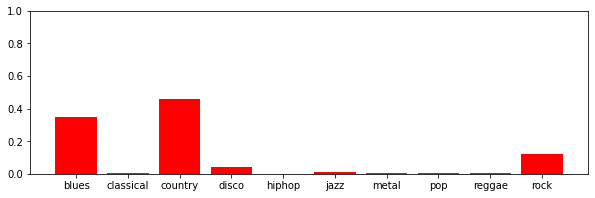


index :845
real Genre : reggae
predicted Genre :reggae


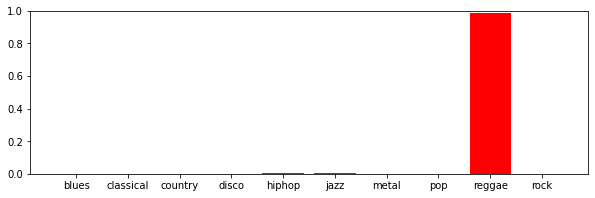


index :621
real Genre : jazz
predicted Genre :jazz


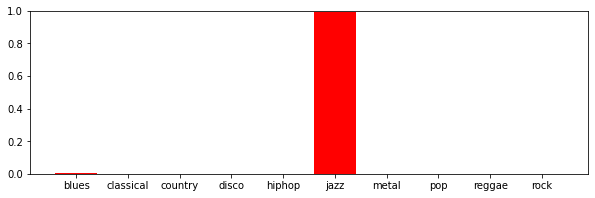


index :1120
real Genre : metal
predicted Genre :metal


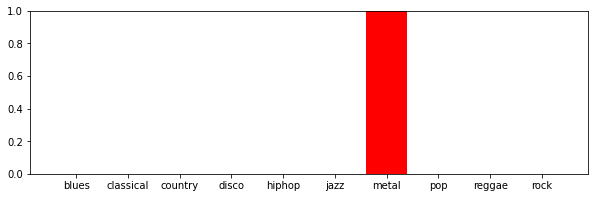


index :248
real Genre : classical
predicted Genre :classical


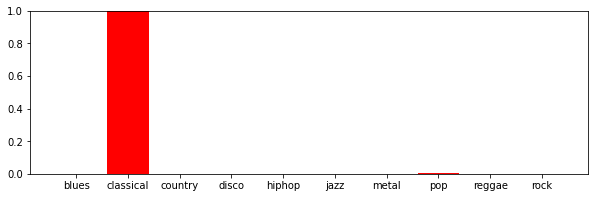

In [25]:
correct=0
wrong=0
for i in range(30):
  a=random.randint(0,len(cnn_x_test)-1)
  sample=cnn_x_test[a].reshape(1,cnn_x_test.shape[1],cnn_x_test.shape[2],1)
  print("\nindex :{}\nreal Genre : {}".format(a,music_genres[cnn_y_test[a][0]]))
  prediction=model.predict(sample)
  index=np.argmax(prediction,axis=1)
  print("predicted Genre :{}".format(music_genres[index[0]]))
  plt.figure(figsize=(10,3))
  plt.bar(music_genres,prediction[0],color="r")
  plt.ylim(0,1)
  plt.show()
  if cnn_y_test[a][0]==index[0]:
    correct+=1
  else:
    wrong+=1

In [26]:
correct,wrong

(27, 3)

In [27]:
result=model.evaluate(cnn_x_test,cnn_y_test)

42/42 [==============================] - 2s 34ms/step - loss: 0.9471 - accuracy: 0.8802


In [28]:
result

[0.9470651745796204, 0.8802123069763184]

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score

In [31]:
y_predicted=model.predict(cnn_x_test)

In [32]:
matrics=confusion_matrix(cnn_y_test,np.argmax(y_predicted,axis=1))

In [33]:
matrics

array([[118,   0,   3,   0,   0,   2,   1,   0,   1,   7],
       [  0, 131,   0,   0,   0,   1,   0,   0,   0,   0],
       [  1,   2, 106,   1,   0,   3,   0,   0,   0,  19],
       [  0,   0,   1, 124,   0,   0,   0,   4,   1,   2],
       [  1,   0,   2,   9, 111,   0,   1,   5,   3,   0],
       [  0,   8,   3,   0,   0, 119,   0,   1,   0,   0],
       [  1,   0,   0,   2,   2,   0, 118,   0,   0,   9],
       [  0,   0,   6,   1,   1,   2,   0, 119,   1,   2],
       [  0,   1,   3,   4,   6,   0,   0,   2, 110,   6],
       [  0,   1,  13,   2,   0,   1,   3,   5,   2, 105]], dtype=int64)

In [35]:
acc=accuracy_score(cnn_y_test,np.argmax(y_predicted,axis=1))
acc

0.8802122820318423

In [37]:
pc_score=precision_score(cnn_y_test,np.argmax(y_predicted,axis=1),pos_label=[0,1,2,3,4,5,6,7,8,9],average=None)
pc_score

C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1360: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.97520661, 0.91608392, 0.77372263, 0.86713287, 0.925     ,
       0.9296875 , 0.95934959, 0.875     , 0.93220339, 0.7       ])

In [38]:
avg_pc_score=precision_score(cnn_y_test,np.argmax(y_predicted,axis=1),pos_label=[0,1,2,3,4,5,6,7,8,9],average='macro')
avg_pc_score

C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1360: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.88533865058507

In [39]:
f1=f1_score(cnn_y_test,np.argmax(y_predicted,axis=1),pos_label=[0,1,2,3,4,5,6,7,8,9],average=None)
f1

C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1360: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.93280632, 0.95272727, 0.78810409, 0.90181818, 0.88095238,
       0.91891892, 0.9254902 , 0.8880597 , 0.88      , 0.74468085])